## < Correlation Analysis >

We want to find out if there are any significant correations between "price" and other factor variables such as reviews, availability, room type, and the distance from the center of NYC.

In [16]:
# Import packages
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv("~/Desktop/AirBnbNYC2019.csv") 

In [5]:
# Set up a new column "distance" between the center of NYCC and each rental locations.
# Set Enpire Sate Building as NYC center.
# Use latitudes and longitudes.

from geopy.distance import vincenty

# Define the two points for entire entries
start = (40.748817, -73.985428)
stop = (df['latitude'], df['longitude'])

In [6]:
def distance_calc (row):
    start = (40.748817, -73.985428)
    stop = (row['latitude'], row['longitude'])

    return vincenty(start, stop).meters

In [7]:
# Add a new columnn "distance" to the dataset

df['distance'] = df.apply (lambda row: distance_calc (row),axis=1)

In [15]:
# Confirm the 'distance' column has been added to df successfully

list(df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'distance']

In [9]:
# Convert categorical variable "room_type" into numerical variable

from sklearn.preprocessing import LabelEncoder

df['room_type'] = df['room_type'].fillna('None')
label_encoder = LabelEncoder()
df['room_type'] = label_encoder.fit_transform(df['room_type'])

In [10]:
# List unique room types with numarical substitute

df['room_type'].unique()

array([1, 0, 2])

0 = Entire home/apt, 1 = Private room, 2 = Shared room

In [11]:
# Narrow down predictor variables by dropping columns that are duplicated or unneccessary for this analysis.

df3 = df.drop(columns=['id','name','host_id','host_name','latitude','longitude','last_review',
                       'neighbourhood_group','neighbourhood'])
df3.head()

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance
0,1,149,1,9,0.21,6,365,11306.162270
1,0,225,1,45,0.38,2,355,551.441501
2,1,150,3,0,NaN,1,365,7628.744546
3,0,89,1,270,4.64,1,194,7396.348994
4,0,80,10,9,0.10,1,0,6533.805766


In [12]:
# Correlation matrix 

corr_matrix = df3.corr()
corr_matrix

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance
room_type,1.000000,-0.249350,-0.069792,0.002724,0.040671,-0.106055,0.022500,0.181876
price,-0.249350,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829,-0.175676
minimum_nights,-0.069792,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303,-0.075139
number_of_reviews,0.002724,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028,0.060669
reviews_per_month,0.040671,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791,0.120357
calculated_host_listings_count,-0.106055,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701,-0.120738
availability_365,0.022500,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000,0.096433
distance,0.181876,-0.175676,-0.075139,0.060669,0.120357,-0.120738,0.096433,1.000000


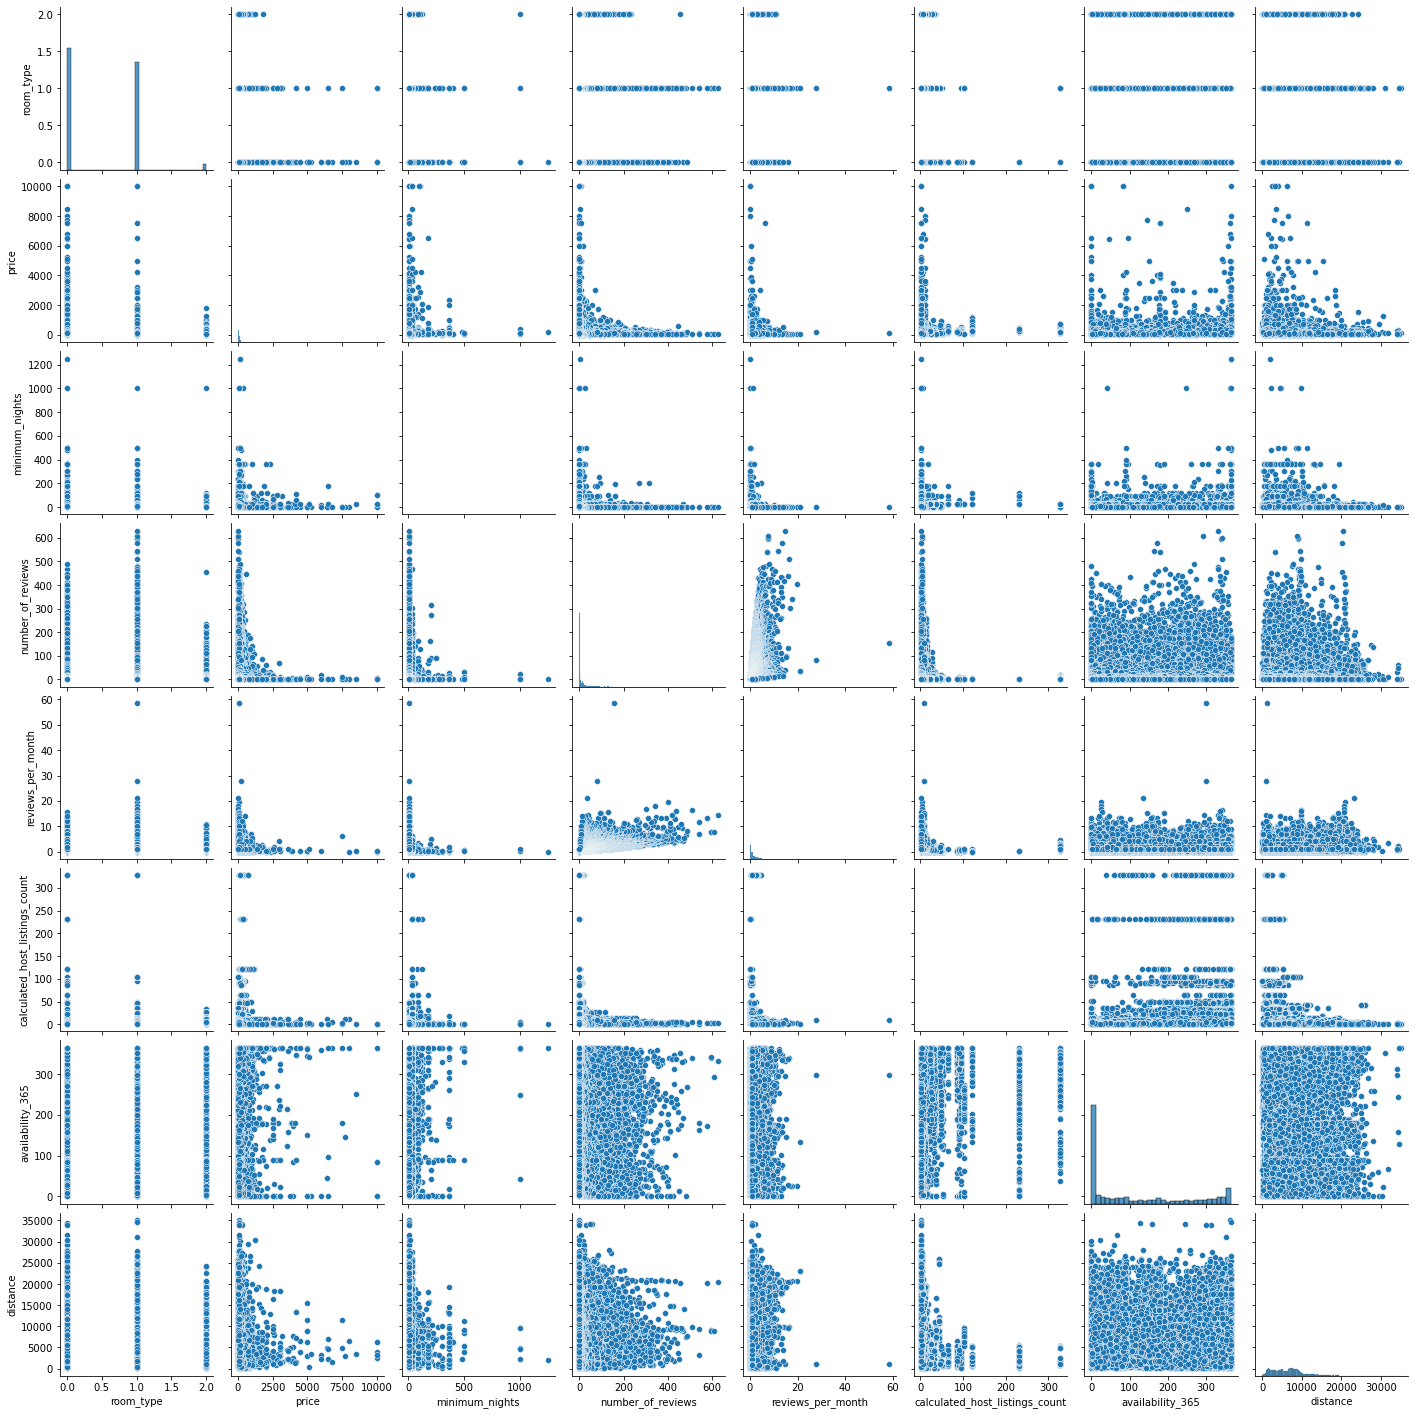

In [13]:
# Correlation matrix plot

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df3)

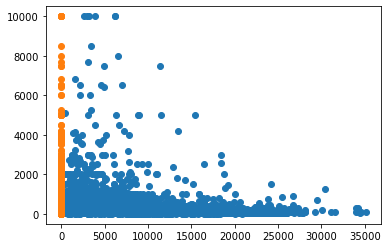

In [14]:
# Verify with plots

plt.scatter(df3['distance'],df3['price'])
plt.scatter(df3['room_type'],df3['price'])

< Correlation Summary >

Based on the correlation coefficients, price is affected by room_type the most since its correlation coefficient is '-0.249350': slight negative impact => price gets the highest when the room_type are smaller from the order of 0 to 2 = Entire home/apt to Shared room. Distance has the second highest impact with -0.18.